## US Accidents Exploratory Data Analysis

In [1]:
pip install --upgrade matplotlib

  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opendatasets --upgrade 

Note: you may need to restart the kernel to use updated packages.


In [8]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  rohitdas2002


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|███████████████████████████████████████████████████████████████████████████████| 653M/653M [02:22<00:00, 4.80MB/s]


In [1]:
data_filename = './us-accidents/US_Accidents_March23.csv'

# Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [2]:
 import pandas as pd

In [3]:
df = pd.read_csv(data_filename)

In [4]:
df_population = pd.read_csv("US_population_data.csv")

In [5]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [34]:
df_population.head(5)

,Name,State,Year,Population
0,Alabama,AL,2016,4863300
1,Alaska,AK,2016,741894
2,Arizona,AZ,2016,6931071
3,Arkansas,AR,2016,2988248
4,California,CA,2016,39250017


In [35]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        416 non-null    object
 1   State       416 non-null    object
 2   Year        416 non-null    int64 
 3   Population  416 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.1+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [6]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
ID                       0.000000e+00
Distance(mi)             0.000000e+00
Start_Lng                0.000000e+00
Source                   0.000000e+00
Severity    

In [ ]:
missing_percentages[missing_percentages !=0]

<Axes: >

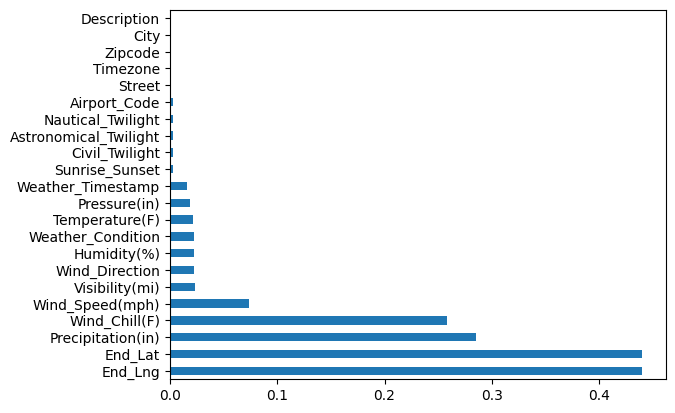

In [11]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

### Plotting the Missing values to check the distribution of missing values per column

## Exploratory Data Analysis and Visualization
columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

### City Column Analysis

In [5]:
cities = df.City.unique()
len(cities)

13679

In [6]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Saint Croix         1
Masardis            1
Okaton              1
Wasta               1
Adell               1
Name: count, Length: 13678, dtype: int64

In [22]:
cities_by_accidents[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

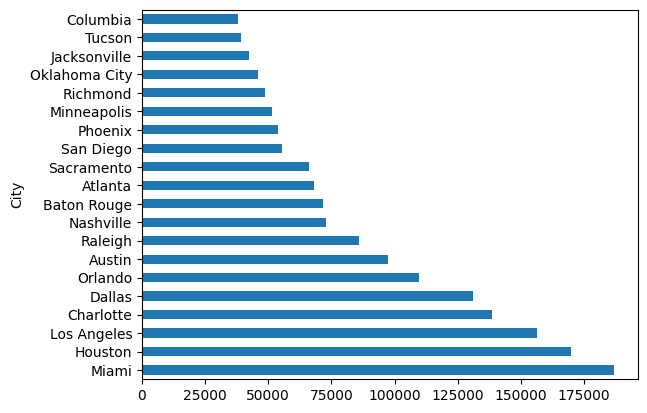

In [24]:
cities_by_accidents[:20].plot(kind = 'barh')

### Visualizing Total number of Accidents by city in which we found that Miami, Houston, Los Angeles,
###  Charlotte and Dallas are the Top 5 Cities with most number of Accidents

In [7]:
import seaborn as sns 
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

### Distribution for the no of Accidents

<Axes: xlabel='count', ylabel='Count'>

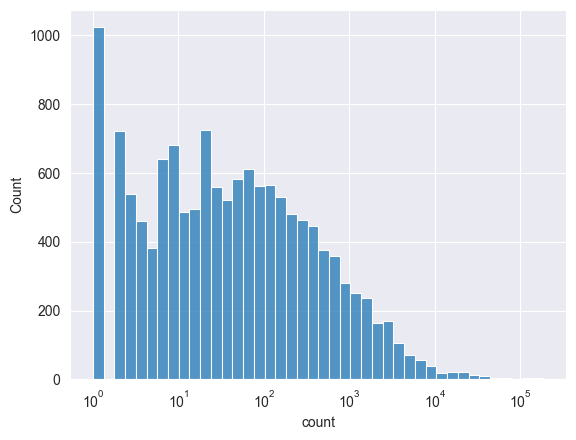

In [38]:
sns.histplot(cities_by_accidents, log_scale = True)

### By this graph we can analyze that the major chunk of Accidents are between 0 to 100 Accidents and we can also see that
### there are 1023 cities with only 1 Accident which seems suspicious because its the data for almost 7 years so it needs some investigation
### or else we can skip those cities with less than 10 accidents because we can't really make any useful insights with such small no of rows

In [44]:
cities_by_accidents[cities_by_accidents == 1] 

City
American Fork-Pleasant Grove    1
Berlin township                 1
District 1 Abingdon             1
Selby                           1
Smackover                       1
                               ..
Saint Croix                     1
Masardis                        1
Okaton                          1
Wasta                           1
Adell                           1
Name: count, Length: 1023, dtype: int64

### These are the cities with only 1 Accident 

In [67]:
cities_by_accidents[cities_by_accidents == 10] 

City
Orlinda                10
Lecompton              10
Hume                   10
Springer               10
Setauket               10
                       ..
Pierceton              10
Benton City            10
Keansburg              10
Eunice                 10
Luke Air Force Base    10
Name: count, Length: 209, dtype: int64

### These are the cities with only 10 Accident 

In [75]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [78]:
len(high_accident_cities) / len(cities)

0.0894578313253012

### Start Time Column Analysis

In [11]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')  ## converted it to datetime format

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int32

C:\Users\user\AppData\Local\Temp\ipykernel_13476\2767187012.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 0.8})


<Axes: xlabel='Start_Time'>

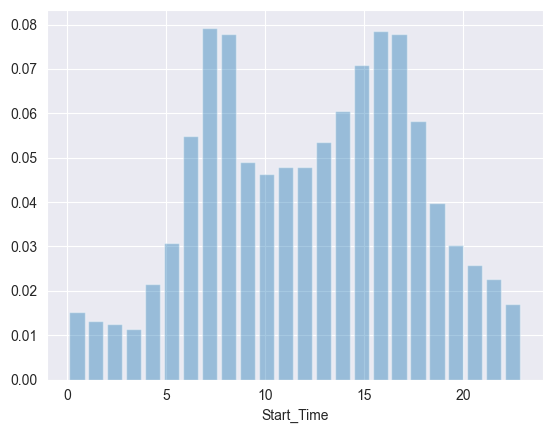

In [54]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 0.8})

- A high percentage of accidents occur between 6 am to 10 am (probably people are in a hurry to get to work)
- Next highest percentage is 3 pm to 6pm (Probably people are returning back from work in this time period)

C:\Users\user\AppData\Local\Temp\ipykernel_13476\498906560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist = True, hist_kws={'rwidth': 1.5})


<Axes: xlabel='Start_Time'>

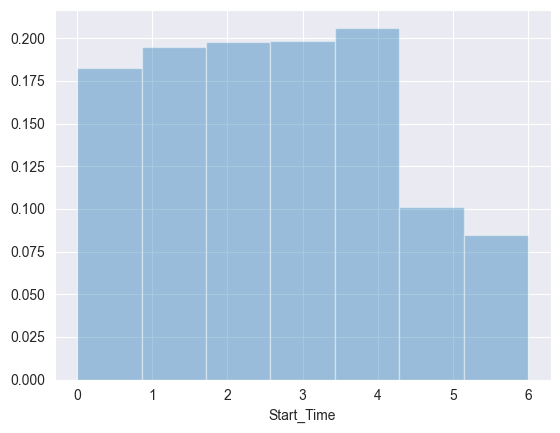

In [59]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist = True, hist_kws={'rwidth': 1.5})

- we can notice that in the weekdays accidents occur more comparatively from Weekends

- Is the distribution of accidents by hours the same on weekends as on weekdays?

C:\Users\user\AppData\Local\Temp\ipykernel_13476\1186104827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

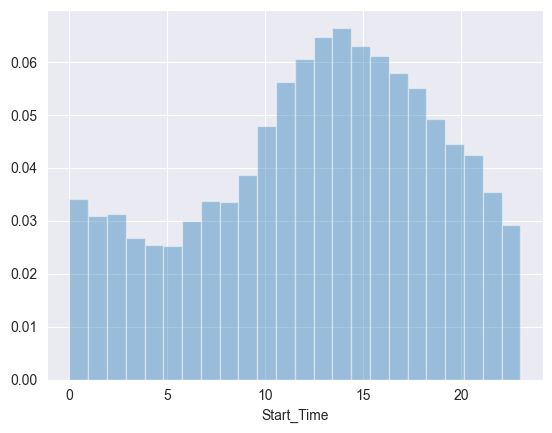

In [65]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

#### - On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

C:\Users\user\AppData\Local\Temp\ipykernel_13476\3804390815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

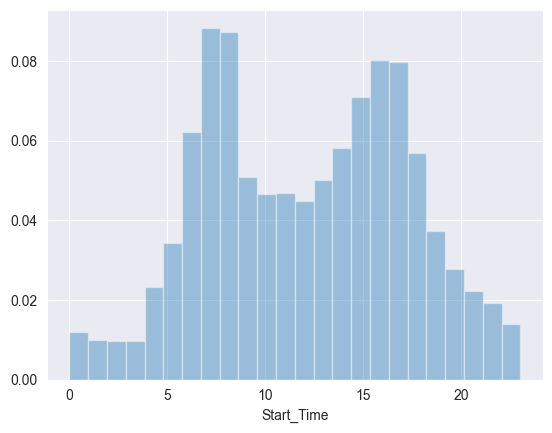

In [67]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

#### - On Mondays, the peak occurs between 5 am and 10 pm, unlike weekdays

C:\Users\user\AppData\Local\Temp\ipykernel_13476\3382391673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

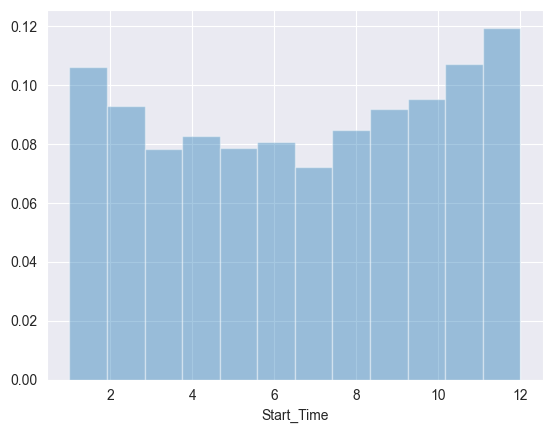

In [68]:

sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_18192\1101022183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

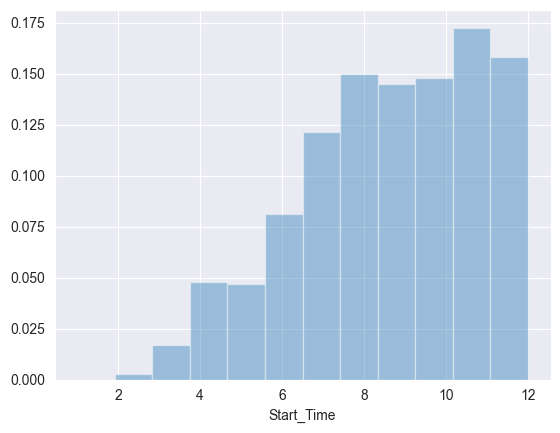

In [61]:
df_2019 = df[df.Start_Time.dt.year == 2016]

sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_14092\3959586177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019_s1.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

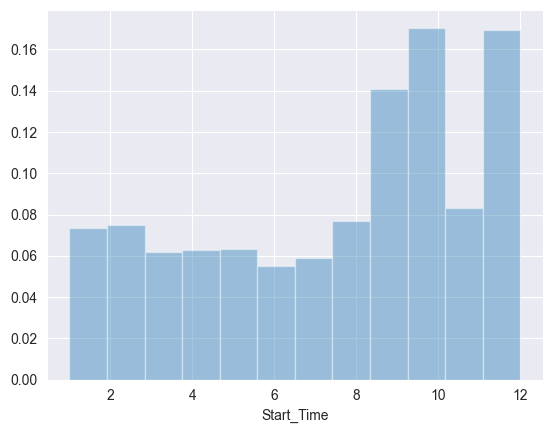

In [40]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_s1 = df_2019[df_2019.Source == 'Source1']
sns.distplot(df_2019_s1.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_14092\440801143.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019_s2.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})


<Axes: xlabel='Start_Time'>

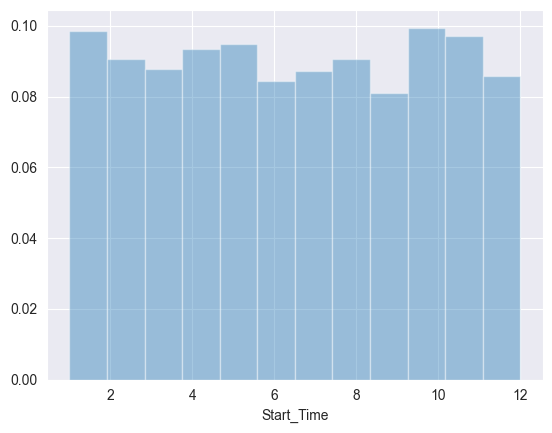

In [39]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_s2 = df_2019[df_2019.Source == 'Source2']
sns.distplot(df_2019_s2.Start_Time.dt.month, bins=12, kde=False, norm_hist = True, hist_kws={'rwidth': 1})

### Can you expain the month-wise trend of accidents?
- Much data is missing for 2016. Maybe even 2017
- There is some issue with the Source1 data

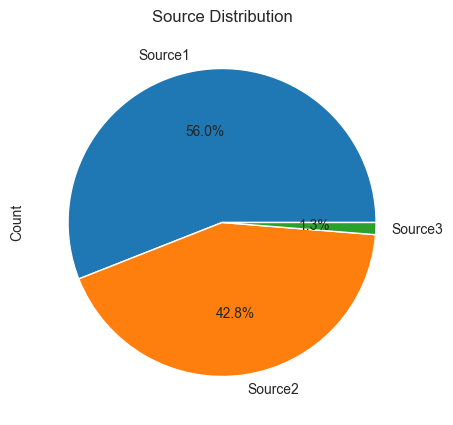

In [82]:
df['Source'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  # Adds percentages to the slices
    figsize=(5, 5),
     
)
plt.ylabel('Count')  # Remove the default ylabel
plt.title('Source Distribution')  # Optional: Add a title
plt.show()

## Start Latitude & Longitude

In [13]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [14]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [7]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

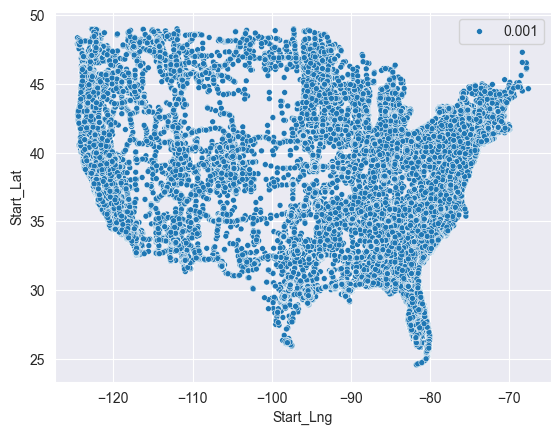

In [87]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

In [9]:
import folium

In [56]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(np.float64(39.865147), np.float64(-84.058723))

In [35]:
for index, row in df[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
    print(index, row)

4372675 Start_Lat    25.881461
Start_Lng   -80.212522
Name: 4372675, dtype: float64
481142 Start_Lat    40.110828
Start_Lng   -76.508110
Name: 481142, dtype: float64
682486 Start_Lat    42.370361
Start_Lng   -71.065208
Name: 682486, dtype: float64
3407768 Start_Lat     38.890309
Start_Lng   -123.053240
Name: 3407768, dtype: float64
7382011 Start_Lat    25.85834
Start_Lng   -80.32283
Name: 7382011, dtype: float64
894520 Start_Lat     37.824409
Start_Lng   -122.268402
Name: 894520, dtype: float64
3402775 Start_Lat    39.13877
Start_Lng   -84.53394
Name: 3402775, dtype: float64
3852015 Start_Lat    40.253140
Start_Lng   -75.307893
Name: 3852015, dtype: float64
1451503 Start_Lat     37.992165
Start_Lng   -121.252846
Name: 1451503, dtype: float64
6148085 Start_Lat     33.710829
Start_Lng   -117.188147
Name: 6148085, dtype: float64
929470 Start_Lat     33.904369
Start_Lng   -117.460419
Name: 929470, dtype: float64
643432 Start_Lat     34.072796
Start_Lng   -118.466736
Name: 643432, dtype: fl

In [14]:
from folium.plugins import HeatMap

In [11]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [12]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
                      

In [15]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### - Through this Heat Map we can Visualize in which Areas of the country accidents most likely occur

## Top 5 States with the Highest Accidents Per Capita (2016-2023)

In [36]:
# Extract the year from the 'Start_Time' column
df['Year'] = df['Start_Time'].dt.year

In [37]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2016


In [38]:
# Filter accidents data for the years 2016-2023
df = df[df['Year'].between(2016, 2023)]
# Filter population data for the years 2016-2023
df_population = df_population[df_population['Year'].between(2016, 2023)]

In [39]:
# Group by 'State' and 'Year' to count the number of accidents
df_accidents_by_state = df.groupby(['State', 'Year']).size().reset_index(name='Accidents')

In [40]:
df_accidents_by_state.head(2)

,State,Year,Accidents
0,AL,2016,135
1,AL,2017,2904


In [41]:
df_merged = pd.merge(df_accidents_by_state, df_population, on=['State', 'Year'], how='inner')

In [42]:
df_merged.head(2)

,State,Year,Accidents,Name,Population
0,AL,2016,135,Alabama,4863300
1,AL,2017,2904,Alabama,4874747


In [43]:
# Convert the Population column to a numeric data type
df_merged['Population'] = pd.to_numeric(df_merged['Population'], errors='coerce')

In [44]:
df_merged['Accidents_Per_Capita'] = df_merged['Accidents'] / df_merged['Population']

In [45]:
df_merged

,State,Year,Accidents,Name,Population,Accidents_Per_Capita
0,AL,2016,135,Alabama,4863300.0,0.000028
1,AL,2017,2904,Alabama,4874747.0,0.000596
2,AL,2018,14100,Alabama,4887871.0,0.002885
3,AL,2019,19238,Alabama,4903185.0,0.003924
4,AL,2020,20185,.Alabama,NaN,NaN
...,...,...,...,...,...,...
383,WY,2019,112,Wyoming,578759.0,0.000194
384,WY,2020,29,.Wyoming,NaN,NaN
385,WY,2021,744,Wyoming,NaN,NaN
386,WY,2022,2075,Wyoming,NaN,NaN


In [46]:
sample_df = df.sample(int(0.01 * len(df)))  # Sample 1% of the DataFrame
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [47]:
# Calculate the average accidents per capita for each city
df_top_states = df_merged.groupby('State')['Accidents_Per_Capita'].mean().reset_index()

In [48]:
# Sort by accidents per capita in descending order and select the top 5 states
df_top_states = df_top_states.sort_values(by='Accidents_Per_Capita', ascending=False).head(5)

In [49]:
df_top_states

,State,Accidents_Per_Capita
38,SC,0.007198
35,OR,0.004221
3,CA,0.004203
25,NC,0.003433
42,UT,0.003270


C:\Users\user\AppData\Local\Temp\ipykernel_18192\3961660060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accidents_Per_Capita', y='State', data=df_top_states, palette='coolwarm')


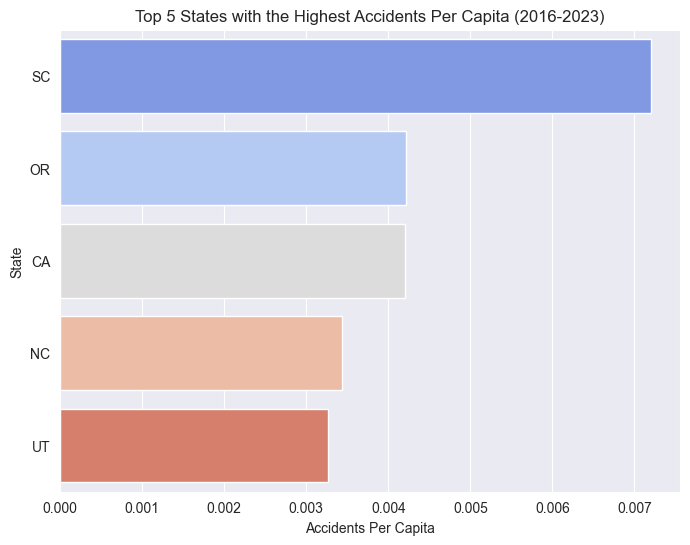

In [50]:
# Plot the top 5 states
plt.figure(figsize=(8, 6))
sns.barplot(x='Accidents_Per_Capita', y='State', data=df_top_states, palette='coolwarm')
plt.title("Top 5 States with the Highest Accidents Per Capita (2016-2023)")
plt.xlabel("Accidents Per Capita")
plt.ylabel("State")
plt.show()

### Summary:
-In this analysis, we identified the top 5 states in the United States with the highest number of accidents per capita from 2016 to 2023. The process involved merging accident data and population data, then calculating the number of accidents per capita for each state.

-The Top 5 States with the Highest Accidents Per Capita (2016-2023) are:

1. South Carolina (SC)
2. Oregon (OR)
3. California (CA)
4. North Carolina (NC)
5. Utah (UT)
These states have the highest ratio of accidents to population size, which can help inform safety measures and resource planning for traffic-related issues.

### Temperature Column Analysis

#### Convert Fahrenheit to Celsius:

In [9]:
df['Temperature_C'] = (df['Temperature(F)'] - 32) * 5/9

In [10]:
print(df['Temperature_C'].describe())

count    7.564541e+06
mean     1.647960e+01
std      1.056314e+01
min     -6.722222e+01
25%      9.444444e+00
50%      1.777778e+01
75%      2.444444e+01
max      9.722222e+01
Name: Temperature_C, dtype: float64


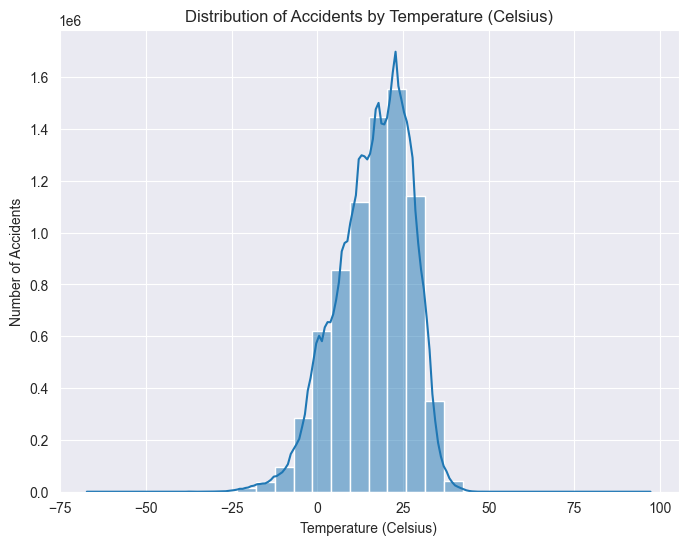

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temperature_C'], bins=30, kde=True)
plt.title("Distribution of Accidents by Temperature (Celsius)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Number of Accidents")
plt.show()

In [51]:
df_grouped = df.groupby('Temperature_C').size().reset_index(name='Accident_Count')

In [53]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Temperature_C', 'Accident_Count_x',
       'Accident_Count_y', 'Accident_Count'],
      dtype='object')

In [52]:
df = df.merge(df_grouped, on='Temperature_C')

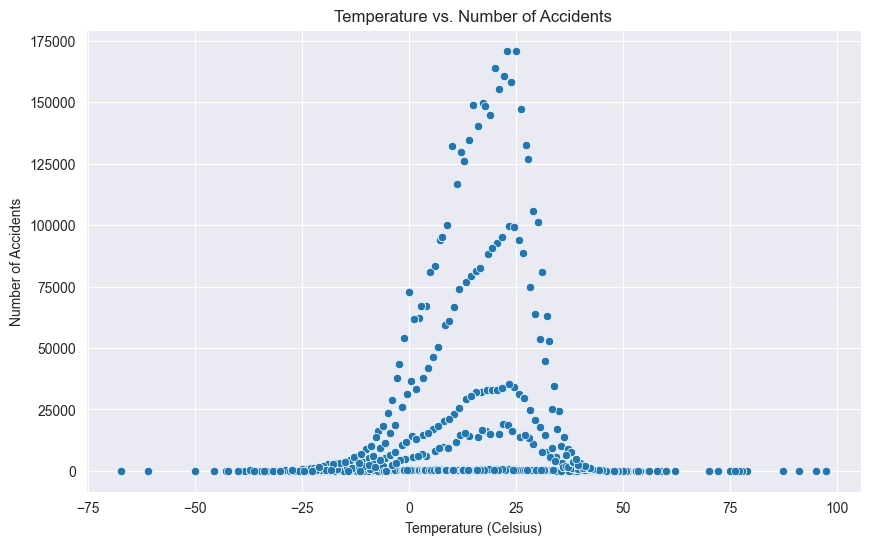

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_C', y='Accident_Count', data=df)
plt.title("Temperature vs. Number of Accidents")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Number of Accidents")
plt.show()

In [31]:
import random

### Sample 10% of the data

In [47]:
# Sample 10% of the data
sample_size = int(0.1 * len(df))
df_sample = df.sample(n=sample_size, random_state=42) 

In [33]:
# Group by Temperature and Count Accidents
df_grouped_sample = df_sample.groupby('Temperature_C').size().reset_index(name='Accident_Count')

In [34]:
# Merge with the sample data (optional)
df_sample = df_sample.merge(df_grouped_sample, on='Temperature_C')

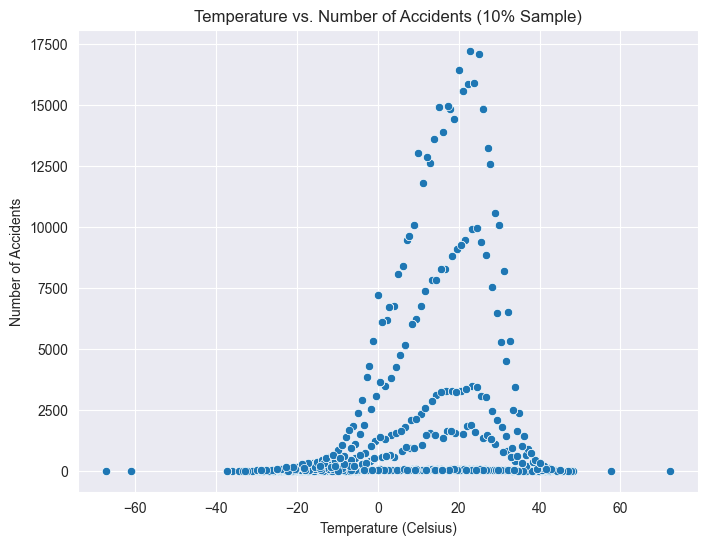

In [35]:
# Create the scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperature_C', y='Accident_Count', data=df_sample)
plt.title("Temperature vs. Number of Accidents (10% Sample)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Number of Accidents")
plt.show()

### Correlation analysis:

In [54]:
correlation = df['Temperature_C'].corr(df['Accident_Count'])
print(f"Correlation between Temperature and Accidents: {correlation}")

Correlation between Temperature and Accidents: 0.30394114454048776


#### The value of 0.30 is closer to 0 than to 1, suggesting that the relationship between temperature and accidents is not very pronounced.

#### The analysis reveals a weak positive correlation between temperature and the number of accidents. 
#### This suggests that as temperature increases, there is a slight tendency for the number of accidents to also increase. 
#### However, the correlation is not strong, indicating that other factors likely play a more significant role in determining accident frequency.

# Weather Condition Analysis

In [37]:
df.Weather_Condition.head(40)

0        Light Rain
1        Light Rain
2          Overcast
3     Mostly Cloudy
4     Mostly Cloudy
5        Light Rain
6          Overcast
7          Overcast
8     Mostly Cloudy
9        Light Rain
10             Rain
11       Light Rain
12         Overcast
13    Mostly Cloudy
14       Light Rain
15         Overcast
16    Mostly Cloudy
17    Mostly Cloudy
18         Overcast
19    Mostly Cloudy
20       Light Snow
21    Mostly Cloudy
22         Overcast
23         Overcast
24         Overcast
25       Light Snow
26       Light Snow
27    Mostly Cloudy
28    Mostly Cloudy
29    Mostly Cloudy
30         Overcast
31       Light Rain
32         Overcast
33         Overcast
34       Light Snow
35         Overcast
36       Light Snow
37       Light Snow
38       Light Snow
39       Light Snow
Name: Weather_Condition, dtype: object

In [40]:
weather_counts = df['Weather_Condition'].value_counts().sort_values(ascending = False).head(20)
print(weather_counts)

Weather_Condition
Fair                       2550361
Mostly Cloudy              1013833
Cloudy                      814455
Clear                       805956
Partly Cloudy               696566
Overcast                    381783
Light Rain                  351921
Scattered Clouds            204156
Light Snow                  128407
Fog                          98586
Rain                         83802
Haze                         75616
Fair / Windy                 35481
Heavy Rain                   32083
Light Drizzle                22599
Thunder in the Vicinity      17484
Cloudy / Windy               16964
T-Storm                      16742
Mostly Cloudy / Windy        16490
Snow                         15469
Name: count, dtype: int64


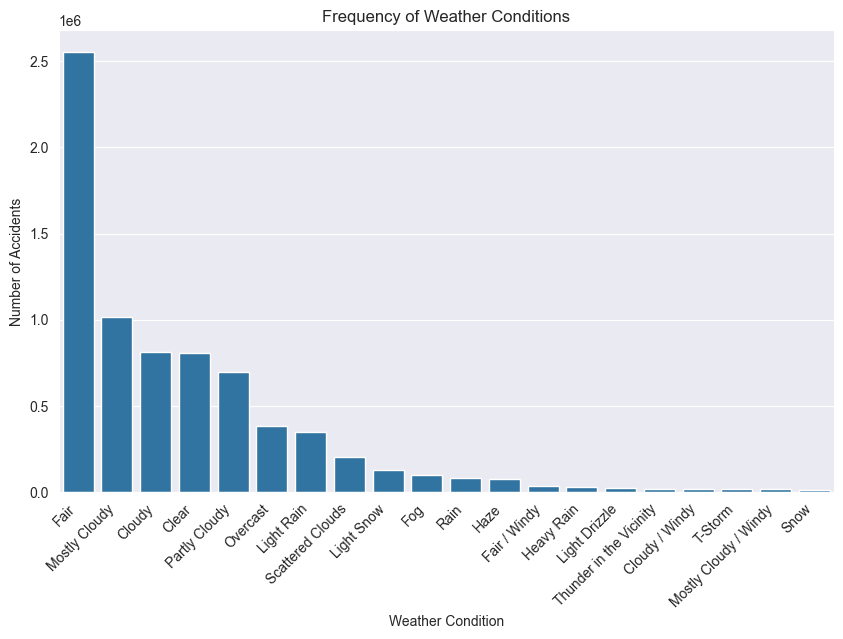

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df, order=weather_counts.index)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

#### - The highest number of accidents occur under Fair weather conditions suggests that weather itself might not be the direct cause of all accidents.

#### - Other chances might be Fair weather likely leads to increased traffic volume, which in turn increases the overall number of accidents 
#### due to higher chances of collisions.
#### - Factors like human error, vehicle maintenance, and road conditions might play a more significant role in accidents, regardless of the weather.
#### But atleast we can say that Weather conditions are not the direct reason for the accidents 

### Trend of accidents year-over-year

In [21]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year  # Create a 'Year' column

In [23]:
accidents_per_year = df.groupby('Year')['ID'].count() # Group the data by Year and count the number of accidents in each year.

In [26]:
accidents_per_year_change = accidents_per_year.pct_change() * 100  # Calculate Year-over-Year Change

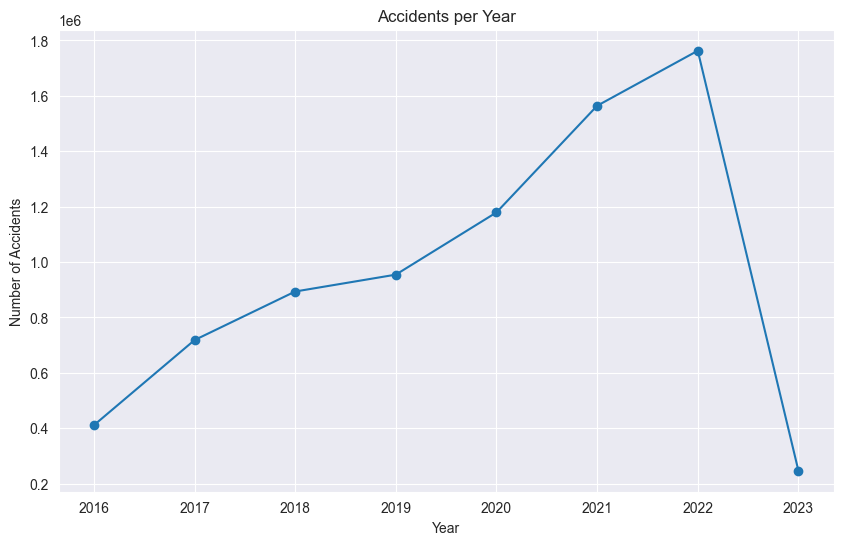

In [24]:
plt.figure(figsize=(10, 6))
accidents_per_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Year')
plt.show()

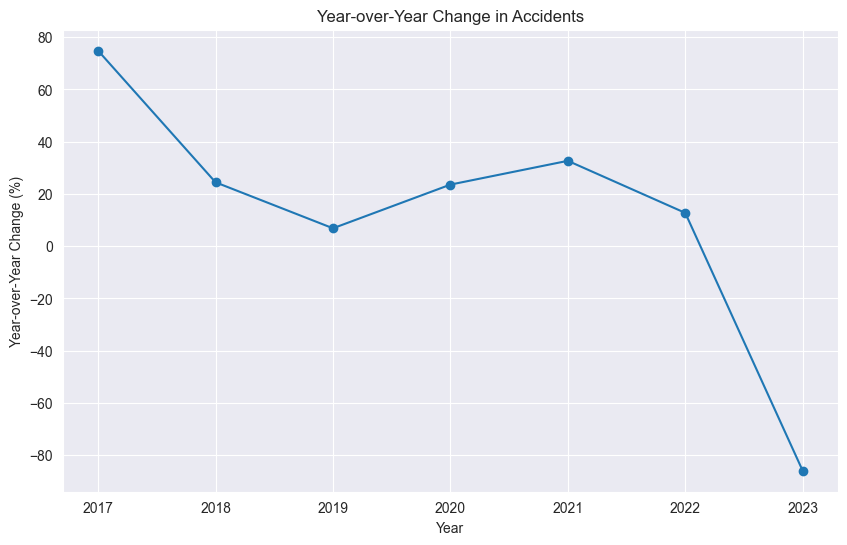

In [27]:
plt.figure(figsize=(10, 6))
accidents_per_year_change.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Year-over-Year Change in Accidents')
plt.show()

#### More precise data points

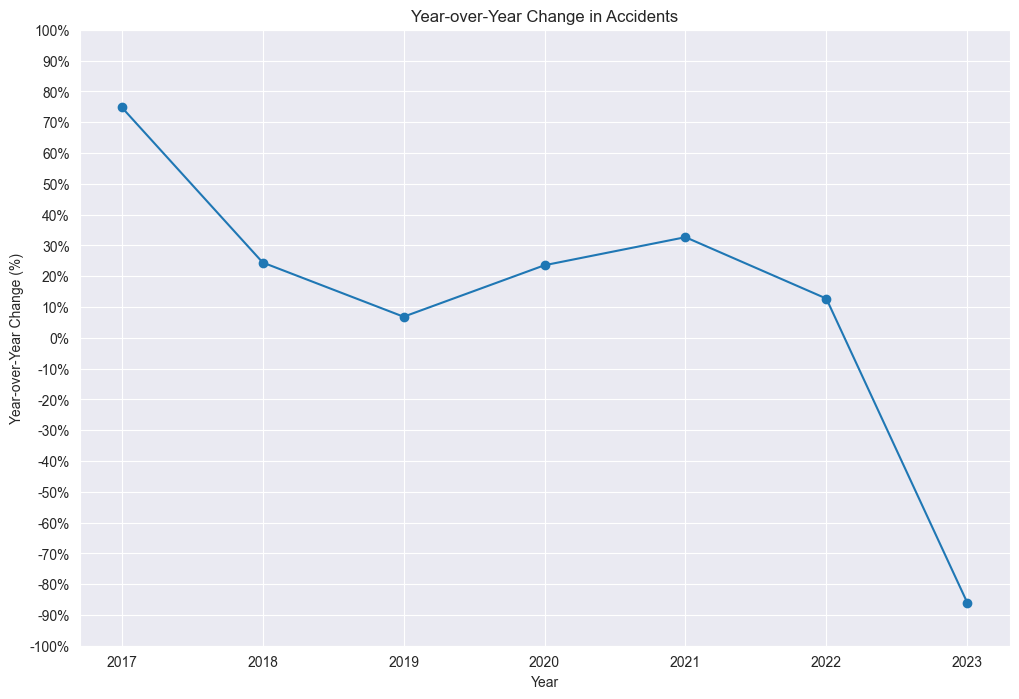

In [31]:
plt.figure(figsize=(12, 8))

# Assuming you have 'accidents_per_year_change' variable containing year-over-year change data

# Set ticks and labels for y-axis with 10 equal gaps between -100 and 100
ticks = range(-100, 110, 10)  # Creates a list from -100 to 100 with steps of 10
tick_labels = [f"{x}%" for x in ticks]  # Creates labels with "%" sign

accidents_per_year_change.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Year-over-Year Change in Accidents')

# Set ticks and labels for the y-axis
plt.yticks(ticks, tick_labels)

plt.grid(True)  # Add gridlines for better readability

plt.show()

# Ask and answer questions
1. Are there more accidents in Warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita
3. Does New York show up in the data? if yes, why is the count lower if this is the most populated city.  
4. What time of the day are accidents most frequent in?
5. Which days of the week have most accidents?
6. which months have the most accidents?
7. What is the trend of acciendents year-over-year (decreasing/increaseing)?

# Summary and Conclusion

Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 8% of the cities have more than 1000 yearly accidents.
- Over 1000 cities have reported just one accident (need to investigate)
- The Top 5 States with the Highest Accidents Per Capita (2016-2023) are:
1. South Carolina (SC)
2. Oregon (OR)
3. California (CA)
4. North Carolina (NC)
5. Utah (UT)